In [1]:
# TO DO :
# take the first 2 tables from GALAH and 3rd table from initial Gaia query
# for the 3rd table, save the GALAH ID and match on it
# then merge the 2 tables on the GALAH sobject ID
# and hopefully ra, dec parameters should match
# * use ra, dec or whatever quantitiy that is in all 3 tables.

# I feel like this is working, but how do I know I'm keeping track of the right labels?
# I think the solution is the on/labels part of the merge command

# Labels in GALAH catalog + GALAH-Gaia xmatch

In [2]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astroquery
from astroquery.vizier import Vizier

########### load data ################################################
# GALAH DR3 main catalog
GALAH_star_labels = Table.read('../process_GALAH_data/GALAH_data_tables/GALAH_DR3_main_allstar_v2.fits', format='fits').to_pandas()
# GALAH Gaia crossmatch for all spectra 
GALAH_xmatch = Table.read('../process_GALAH_data/GALAH_data_tables/GALAH_DR3_VAC_GaiaEDR3_v2.fits', format='fits').to_pandas()

In [3]:
# question: do any of these tables have an identical column?
# and if so, do their numbers agree?

In [4]:
GALAH_star_labels.columns.to_numpy()

array(['star_id', 'sobject_id', 'dr2_source_id', 'dr3_source_id',
       'survey_name', 'field_id', 'flag_repeat', 'wg4_field',
       'wg4_pipeline', 'flag_sp', 'teff', 'e_teff', 'irfm_teff',
       'irfm_ebv', 'irfm_ebv_ref', 'logg', 'e_logg', 'fe_h', 'e_fe_h',
       'flag_fe_h', 'fe_h_atmo', 'vmic', 'vbroad', 'e_vbroad', 'chi2_sp',
       'alpha_fe', 'e_alpha_fe', 'nr_alpha_fe', 'flag_alpha_fe',
       'flux_A_Fe', 'chi_A_Fe', 'Li_fe', 'e_Li_fe', 'nr_Li_fe',
       'flag_Li_fe', 'C_fe', 'e_C_fe', 'nr_C_fe', 'flag_C_fe', 'O_fe',
       'e_O_fe', 'nr_O_fe', 'flag_O_fe', 'Na_fe', 'e_Na_fe', 'nr_Na_fe',
       'flag_Na_fe', 'Mg_fe', 'e_Mg_fe', 'nr_Mg_fe', 'flag_Mg_fe',
       'Al_fe', 'e_Al_fe', 'nr_Al_fe', 'flag_Al_fe', 'Si_fe', 'e_Si_fe',
       'nr_Si_fe', 'flag_Si_fe', 'K_fe', 'e_K_fe', 'nr_K_fe', 'flag_K_fe',
       'Ca_fe', 'e_Ca_fe', 'nr_Ca_fe', 'flag_Ca_fe', 'Sc_fe', 'e_Sc_fe',
       'nr_Sc_fe', 'flag_Sc_fe', 'Sc2_fe', 'e_Sc2_fe', 'nr_Sc2_fe',
       'flag_Sc2_fe', 'Ti_fe', 'e

In [5]:
GALAH_xmatch.columns.to_numpy()

array(['star_id', 'sobject_id', 'dr2_source_id', 'dr3_source_id',
       'angular_distance', 'magnitude_difference',
       'proper_motion_propagation', 'solution_id', 'designation',
       'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error',
       'parallax', 'parallax_error', 'parallax_over_error', 'pm', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr',
       'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al',
       'astrometric_excess_noise', 'astrometric_excess_noise_sig',
       'astrometric_params_solved', 'astrometric_primary_flag',
       'nu_eff_used_in_astrometry', 'pseudocolour', 'pseudocolour_error',
       'ra_pseudocolour_corr', 'dec_pse

In [6]:
merged_labels_xmatch = pd.merge(GALAH_star_labels, GALAH_xmatch, 
                               on = 'sobject_id',validate = '1:1')
merged_labels_xmatch

,star_id_x,sobject_id,dr2_source_id_x,dr3_source_id_x,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,...,ecl_lat,zpt_ll2020,parallax_corr,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag_edr3dist
0,b'03325271-6840304',131116000501002,4667368899326730240,4667368899326730240,b'galah_main',138,0,b'10k_2',b'lbol',0,...,-76.054642,-0.030388,7.002415,142.725815,142.426086,142.936722,142.844009,142.674469,143.048721,b'10033'
1,b'03345385-6836362',131116000501003,4667362989451832320,4667362989451832320,b'galah_main',138,0,b'10k_0',b'lbol',256,...,-76.226684,-0.032021,10.421520,95.959564,95.875595,96.049644,95.952316,95.884872,96.033737,b'10033'
2,b'03422255-6841522',131116000501004,4667324643983679488,4667324643983679488,b'galah_main',138,0,b'10k_26',b'lbol',0,...,-76.912050,-0.031329,0.291478,3443.771729,3342.938232,3541.565918,3483.971191,3378.533447,3580.282227,b'10033'
3,b'03373408-6841062',131116000501005,4667335913977929728,4667335913977929728,b'galah_main',138,0,b'10k_33',b'lbol',1,...,-76.477309,-0.031954,1.250260,798.638184,787.818604,810.052979,800.286011,789.345398,811.077881,b'10033'
4,b'03430488-6843208',131116000501006,4667323681911007232,4667323681911007232,b'galah_main',138,0,b'10k_41',b'lbol',1,...,-76.978613,-0.017053,2.432542,411.515839,408.134827,415.689545,411.509003,406.695099,415.063324,b'10033'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588566,b'15142072-4415325',190225005301395,6003344796319529984,6003344796319529984,b'galah_main',4235,0,b'190225',b'lbol',0,...,-25.256040,-0.028726,2.847024,351.244507,349.097015,353.241211,351.683746,349.809509,354.011597,b'10033'
588567,b'15151322-4415182',190225005301396,6000435312445129728,6000435312445129728,b'galah_main',4235,0,b'190225',b'lbol',0,...,-25.206728,-0.037889,1.172843,853.888489,838.906677,867.245911,853.076721,839.183899,864.308289,b'10033'
588568,b'15162269-4414571',190225005301397,6000421607212226560,6000421607212226560,b'galah_main',4235,0,b'190225',b'lbol',0,...,-25.141297,-0.033880,0.386696,2575.375977,2473.025879,2684.808838,2585.941406,2474.802734,2684.515137,b'10033'
588569,b'15161847-4418028',190225005301398,6000420675196587008,6000420675196587008,b'galah_main',4235,0,b'190225',b'lbol',0,...,-25.194328,-0.024916,0.703119,1433.930054,1385.445068,1480.008423,1388.507812,1354.747192,1420.116333,b'10033'


In [7]:
GALAH_star_cols = ['sobject_id', 'teff', 'logg', 'fe_h', 'ra_dr2', 'dec_dr2',
       'parallax_dr2']
xmatch_star_cols = ['sobject_id', 'ra', 'dec', 
       'parallax', 'dr2_rv_template_teff',
       'dr2_rv_template_logg', 'dr2_rv_template_fe_h']

test_merge = pd.merge(GALAH_star_labels[GALAH_star_cols], GALAH_xmatch[xmatch_star_cols], 
                               on = 'sobject_id',validate = '1:1')
test_merge

,sobject_id,teff,logg,fe_h,ra_dr2,dec_dr2,parallax_dr2,ra,dec,parallax,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h
0,131116000501002,4553.354492,4.714953,-0.335019,53.221132,-68.674800,6.944819,53.221178,-68.674790,6.972027,4000.0,3.0,0.0
1,131116000501003,3622.744629,4.691505,NaN,53.726021,-68.611051,10.360335,53.726071,-68.611080,10.389499,NaN,NaN,NaN
2,131116000501004,4852.475586,2.466885,-1.170157,55.593979,-68.697931,0.266503,55.593978,-68.697933,0.260149,NaN,NaN,NaN
3,131116000501005,5588.500488,3.999357,0.052395,54.392072,-68.685002,1.214608,54.392074,-68.685000,1.218306,NaN,NaN,NaN
4,131116000501006,5709.502930,4.181905,-0.013732,55.770494,-68.722453,2.361054,55.770496,-68.722452,2.415489,5500.0,4.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588566,190225005301395,4531.215332,2.410332,-0.293808,228.586315,-44.259058,2.801816,228.586315,-44.259059,2.818298,NaN,NaN,NaN
588567,190225005301396,6059.499512,3.519315,-0.045074,228.805089,-44.255053,1.158824,228.805089,-44.255053,1.134954,6000.0,3.5,0.0
588568,190225005301397,4132.972656,0.959392,-1.003942,229.094510,-44.249210,0.359564,229.094509,-44.249211,0.352816,5500.0,3.5,0.0
588569,190225005301398,4776.927246,2.420797,0.007314,229.076923,-44.300799,0.631056,229.076920,-44.300800,0.678203,5000.0,2.5,0.0


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


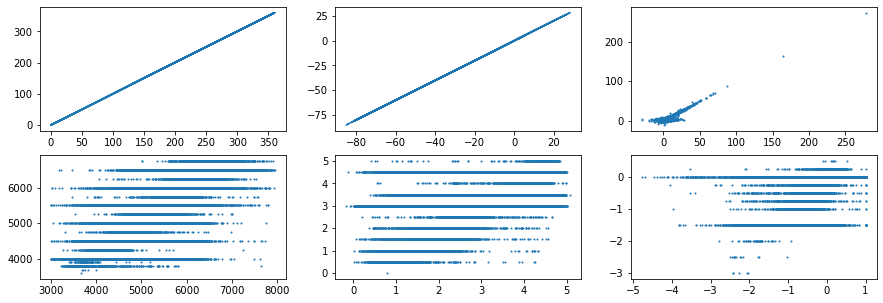

In [8]:
%pylab inline
figure(figsize=(15,5)) # the ra, dec look promising.
# next I'll check the other databases.
subplot(231)
plot(test_merge.ra_dr2, test_merge.ra)
subplot(232)
plot(test_merge.dec_dr2, test_merge.dec)
subplot(233)
plot(test_merge.parallax_dr2, test_merge.parallax, '.', ms=2)

subplot(234)
plot(test_merge.teff, test_merge.dr2_rv_template_teff,'.', ms=2)
subplot(235)
plot(test_merge.logg, test_merge.dr2_rv_template_logg,'.', ms=2)
subplot(236)
plot(test_merge.fe_h, test_merge.dr2_rv_template_fe_h,'.', ms=2)

# Labels from Gaia queried based on source_id

In [9]:
gaia_source_ids = pd.read_csv('/Users/isabelangelo/Desktop/test_source_id_column-result.csv')
gaia_source_ids

,galah_sobject_id,designation,source_id,parallax,rv_template_teff,rv_template_logg,rv_template_fe_h,ra,dec,parallax.1
0,131116000501005,Gaia DR3 4667335913977929728,4667335913977929728,1.218306,5250.0,4.0,-0.25,54.392074,-68.685000,1.218306
1,131116000501006,Gaia DR3 4667323681911007232,4667323681911007232,2.415489,5250.0,4.0,0.50,55.770496,-68.722452,2.415489
2,131116000501026,Gaia DR3 4667306158444531712,4667306158444531712,2.609907,5250.0,3.5,0.25,54.660682,-68.897499,2.609907
3,131116000501034,Gaia DR3 4667288497539041280,4667288497539041280,1.018860,5000.0,2.5,-0.50,55.182558,-69.098617,1.018860
4,131116000501039,Gaia DR3 4667291177598620672,4667291177598620672,2.285162,4750.0,3.5,-0.75,54.769432,-69.065335,2.285162
...,...,...,...,...,...,...,...,...,...,...
124781,190225005301366,Gaia DR3 6003448597087823872,6003448597087823872,0.496699,NaN,NaN,NaN,228.903836,-43.898355,0.496699
124782,190225005301370,Gaia DR3 6000446067043209216,6000446067043209216,0.813784,4250.0,1.5,0.00,228.959700,-43.926211,0.813784
124783,190225005301378,Gaia DR3 6003439938433655808,6003439938433655808,1.025423,4500.0,1.5,-0.50,228.698638,-44.102276,1.025423
124784,190225005301392,Gaia DR3 6000433903695851520,6000433903695851520,6.204114,5500.0,4.0,0.00,228.993193,-44.189588,6.204114


In [10]:
merge1 = pd.merge(GALAH_star_labels[GALAH_star_cols], gaia_source_ids, 
         left_on = 'sobject_id', right_on='galah_sobject_id')
merge1

,sobject_id,teff,logg,fe_h,ra_dr2,dec_dr2,parallax_dr2,galah_sobject_id,designation,source_id,parallax,rv_template_teff,rv_template_logg,rv_template_fe_h,ra,dec,parallax.1
0,131116000501005,5588.500488,3.999357,0.052395,54.392072,-68.685002,1.214608,131116000501005,Gaia DR3 4667335913977929728,4667335913977929728,1.218306,5250.0,4.0,-0.25,54.392074,-68.685000,1.218306
1,131116000501006,5709.502930,4.181905,-0.013732,55.770494,-68.722453,2.361054,131116000501006,Gaia DR3 4667323681911007232,4667323681911007232,2.415489,5250.0,4.0,0.50,55.770496,-68.722452,2.415489
2,131116000501026,5323.248047,4.468189,0.390498,54.660681,-68.897502,2.598451,131116000501026,Gaia DR3 4667306158444531712,4667306158444531712,2.609907,5250.0,3.5,0.25,54.660682,-68.897499,2.609907
3,131116000501034,5088.357422,3.831998,-0.227252,55.182547,-69.098619,0.967845,131116000501034,Gaia DR3 4667288497539041280,4667288497539041280,1.018860,5000.0,2.5,-0.50,55.182558,-69.098617,1.018860
4,131116000501039,4765.561523,3.884764,-0.135199,54.769429,-69.065330,1.570470,131116000501039,Gaia DR3 4667291177598620672,4667291177598620672,2.285162,4750.0,3.5,-0.75,54.769432,-69.065335,2.285162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124781,190225005301366,3440.043945,0.508216,NaN,228.909298,-43.896606,0.413437,190225005301366,Gaia DR3 6003448597087823872,6003448597087823872,0.496699,NaN,NaN,NaN,228.903836,-43.898355,0.496699
124782,190225005301370,4234.752930,1.791848,-0.133460,228.959700,-43.926210,0.813496,190225005301370,Gaia DR3 6000446067043209216,6000446067043209216,0.813784,4250.0,1.5,0.00,228.959700,-43.926211,0.813784
124783,190225005301378,4784.185547,2.494993,-0.125307,228.698641,-44.102274,1.060059,190225005301378,Gaia DR3 6003439938433655808,6003439938433655808,1.025423,4500.0,1.5,-0.50,228.698638,-44.102276,1.025423
124784,190225005301392,6320.469238,4.002362,-0.161073,228.993198,-44.189586,6.471249,190225005301392,Gaia DR3 6000433903695851520,6000433903695851520,6.204114,5500.0,4.0,0.00,228.993193,-44.189588,6.204114


In [11]:
merge2 = pd.merge(GALAH_xmatch[xmatch_star_cols], gaia_source_ids, 
                 left_on = 'sobject_id', right_on='galah_sobject_id')
merge2

,sobject_id,ra_x,dec_x,parallax_x,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,galah_sobject_id,designation,source_id,parallax_y,rv_template_teff,rv_template_logg,rv_template_fe_h,ra_y,dec_y,parallax.1
0,131116000501005,54.392074,-68.685000,1.218306,NaN,NaN,NaN,131116000501005,Gaia DR3 4667335913977929728,4667335913977929728,1.218306,5250.0,4.0,-0.25,54.392074,-68.685000,1.218306
1,131116000501006,55.770496,-68.722452,2.415489,5500.0,4.5,0.0,131116000501006,Gaia DR3 4667323681911007232,4667323681911007232,2.415489,5250.0,4.0,0.50,55.770496,-68.722452,2.415489
2,131116000501026,54.660682,-68.897499,2.609907,NaN,NaN,NaN,131116000501026,Gaia DR3 4667306158444531712,4667306158444531712,2.609907,5250.0,3.5,0.25,54.660682,-68.897499,2.609907
3,131116000501034,55.182558,-69.098617,1.018860,NaN,NaN,NaN,131116000501034,Gaia DR3 4667288497539041280,4667288497539041280,1.018860,5000.0,2.5,-0.50,55.182558,-69.098617,1.018860
4,131116000501039,54.769432,-69.065335,2.285162,NaN,NaN,NaN,131116000501039,Gaia DR3 4667291177598620672,4667291177598620672,2.285162,4750.0,3.5,-0.75,54.769432,-69.065335,2.285162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124781,190225005301366,228.909297,-43.896606,0.351464,4000.0,3.0,0.0,190225005301366,Gaia DR3 6003448597087823872,6003448597087823872,0.496699,NaN,NaN,NaN,228.903836,-43.898355,0.496699
124782,190225005301370,228.959700,-43.926211,0.813784,4500.0,3.0,0.0,190225005301370,Gaia DR3 6000446067043209216,6000446067043209216,0.813784,4250.0,1.5,0.00,228.959700,-43.926211,0.813784
124783,190225005301378,228.698638,-44.102276,1.025423,5000.0,3.0,0.0,190225005301378,Gaia DR3 6003439938433655808,6003439938433655808,1.025423,4500.0,1.5,-0.50,228.698638,-44.102276,1.025423
124784,190225005301392,228.993193,-44.189588,6.204114,NaN,NaN,NaN,190225005301392,Gaia DR3 6000433903695851520,6000433903695851520,6.204114,5500.0,4.0,0.00,228.993193,-44.189588,6.204114


<AxesSubplot:>

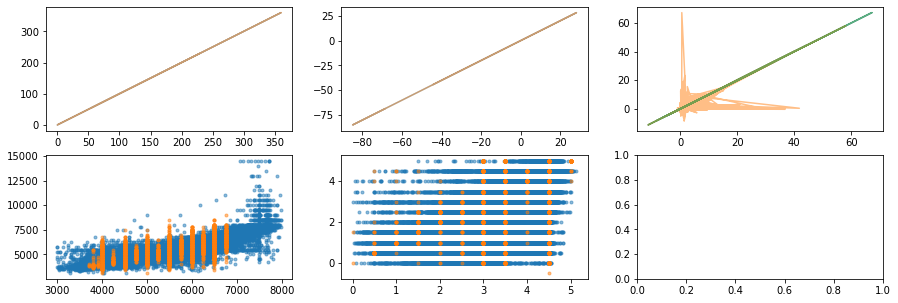

In [12]:
figure(figsize=(15,5)) # the ra, dec look promising.
# next I'll check the other databases.
subplot(231)
plot(merge1.ra_dr2, merge1.ra, alpha=0.5)
plot(merge2.ra_x, merge2.ra_y, alpha=0.5)

subplot(232)
plot(merge1.dec_dr2, merge1.dec, alpha=0.5)
plot(merge2.dec_x, merge2.dec_y, alpha=0.5)

subplot(233) # tells us parallax_x doesn't agree totally
plot(merge1['parallax'], merge1['parallax.1'], alpha=0.5)
plot(merge2['parallax_x'], merge2['parallax_y'], alpha=0.5) # this is the one that's different
plot(merge2['parallax_y'], merge2['parallax.1'], alpha=0.5)

subplot(234)
plot(merge1.teff, merge1.rv_template_teff, '.', alpha=0.5)
plot(merge2.dr2_rv_template_teff,merge2.rv_template_teff, '.', alpha=0.5)

subplot(235)
plot(merge1.logg, merge1.rv_template_logg, '.', alpha=0.5)
plot(merge2.dr2_rv_template_logg,merge2.rv_template_logg, '.', alpha=0.5)

subplot(236)


# Labels from Gaia based on Gaia DR3 designation

In [13]:
gaia_designations = pd.read_csv('/Users/isabelangelo/Desktop/test_designation_column-result.csv')
gaia_designations

,galah_sobject_id,designation,source_id,parallax,rv_template_teff,rv_template_logg,rv_template_fe_h,ra,dec,parallax.1
0,131116000501002,Gaia DR3 4667368899326729856,4667368899326729856,6.972027,4250.0,4.5,0.75,53.221178,-68.674790,6.972027
1,131116000501003,Gaia DR3 4667362989451832448,4667362989451832448,10.389499,3800.0,4.0,0.00,53.726071,-68.611080,10.389499
2,131116000501004,Gaia DR3 4667324643983679744,4667324643983679744,0.260149,4750.0,2.5,-1.50,55.593978,-68.697933,0.260149
3,131116000501005,Gaia DR3 4667335913977929728,4667335913977929728,1.218306,5250.0,4.0,-0.25,54.392074,-68.685000,1.218306
4,131116000501006,Gaia DR3 4667323681911007232,4667323681911007232,2.415489,5250.0,4.0,0.50,55.770496,-68.722452,2.415489
...,...,...,...,...,...,...,...,...,...,...
588459,190225005301395,Gaia DR3 6003344796319529600,6003344796319529600,2.818298,4500.0,2.0,-0.50,228.586315,-44.259059,2.818298
588460,190225005301396,Gaia DR3 6000435312445129984,6000435312445129984,1.134954,6500.0,4.0,0.25,228.805089,-44.255053,1.134954
588461,190225005301397,Gaia DR3 6000421607212226048,6000421607212226048,0.352816,4500.0,1.5,-0.50,229.094509,-44.249211,0.352816
588462,190225005301398,Gaia DR3 6000420675196587392,6000420675196587392,0.678203,5000.0,2.5,0.00,229.076920,-44.300800,0.678203


In [14]:
merge_1 = pd.merge(GALAH_star_labels[GALAH_star_cols], gaia_designations, 
         left_on = 'sobject_id', right_on='galah_sobject_id')
merge_1

,sobject_id,teff,logg,fe_h,ra_dr2,dec_dr2,parallax_dr2,galah_sobject_id,designation,source_id,parallax,rv_template_teff,rv_template_logg,rv_template_fe_h,ra,dec,parallax.1
0,131116000501002,4553.354492,4.714953,-0.335019,53.221132,-68.674800,6.944819,131116000501002,Gaia DR3 4667368899326729856,4667368899326729856,6.972027,4250.0,4.5,0.75,53.221178,-68.674790,6.972027
1,131116000501003,3622.744629,4.691505,NaN,53.726021,-68.611051,10.360335,131116000501003,Gaia DR3 4667362989451832448,4667362989451832448,10.389499,3800.0,4.0,0.00,53.726071,-68.611080,10.389499
2,131116000501004,4852.475586,2.466885,-1.170157,55.593979,-68.697931,0.266503,131116000501004,Gaia DR3 4667324643983679744,4667324643983679744,0.260149,4750.0,2.5,-1.50,55.593978,-68.697933,0.260149
3,131116000501005,5588.500488,3.999357,0.052395,54.392072,-68.685002,1.214608,131116000501005,Gaia DR3 4667335913977929728,4667335913977929728,1.218306,5250.0,4.0,-0.25,54.392074,-68.685000,1.218306
4,131116000501006,5709.502930,4.181905,-0.013732,55.770494,-68.722453,2.361054,131116000501006,Gaia DR3 4667323681911007232,4667323681911007232,2.415489,5250.0,4.0,0.50,55.770496,-68.722452,2.415489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588459,190225005301395,4531.215332,2.410332,-0.293808,228.586315,-44.259058,2.801816,190225005301395,Gaia DR3 6003344796319529600,6003344796319529600,2.818298,4500.0,2.0,-0.50,228.586315,-44.259059,2.818298
588460,190225005301396,6059.499512,3.519315,-0.045074,228.805089,-44.255053,1.158824,190225005301396,Gaia DR3 6000435312445129984,6000435312445129984,1.134954,6500.0,4.0,0.25,228.805089,-44.255053,1.134954
588461,190225005301397,4132.972656,0.959392,-1.003942,229.094510,-44.249210,0.359564,190225005301397,Gaia DR3 6000421607212226048,6000421607212226048,0.352816,4500.0,1.5,-0.50,229.094509,-44.249211,0.352816
588462,190225005301398,4776.927246,2.420797,0.007314,229.076923,-44.300799,0.631056,190225005301398,Gaia DR3 6000420675196587392,6000420675196587392,0.678203,5000.0,2.5,0.00,229.076920,-44.300800,0.678203


In [15]:
merge_2 = pd.merge(GALAH_xmatch[xmatch_star_cols], gaia_designations, 
                 left_on = 'sobject_id', right_on='galah_sobject_id')
merge_2

,sobject_id,ra_x,dec_x,parallax_x,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,galah_sobject_id,designation,source_id,parallax_y,rv_template_teff,rv_template_logg,rv_template_fe_h,ra_y,dec_y,parallax.1
0,131116000501002,53.221178,-68.674790,6.972027,4000.0,3.0,0.0,131116000501002,Gaia DR3 4667368899326729856,4667368899326729856,6.972027,4250.0,4.5,0.75,53.221178,-68.674790,6.972027
1,131116000501003,53.726071,-68.611080,10.389499,NaN,NaN,NaN,131116000501003,Gaia DR3 4667362989451832448,4667362989451832448,10.389499,3800.0,4.0,0.00,53.726071,-68.611080,10.389499
2,131116000501004,55.593978,-68.697933,0.260149,NaN,NaN,NaN,131116000501004,Gaia DR3 4667324643983679744,4667324643983679744,0.260149,4750.0,2.5,-1.50,55.593978,-68.697933,0.260149
3,131116000501005,54.392074,-68.685000,1.218306,NaN,NaN,NaN,131116000501005,Gaia DR3 4667335913977929728,4667335913977929728,1.218306,5250.0,4.0,-0.25,54.392074,-68.685000,1.218306
4,131116000501006,55.770496,-68.722452,2.415489,5500.0,4.5,0.0,131116000501006,Gaia DR3 4667323681911007232,4667323681911007232,2.415489,5250.0,4.0,0.50,55.770496,-68.722452,2.415489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588459,190225005301395,228.586315,-44.259059,2.818298,NaN,NaN,NaN,190225005301395,Gaia DR3 6003344796319529600,6003344796319529600,2.818298,4500.0,2.0,-0.50,228.586315,-44.259059,2.818298
588460,190225005301396,228.805089,-44.255053,1.134954,6000.0,3.5,0.0,190225005301396,Gaia DR3 6000435312445129984,6000435312445129984,1.134954,6500.0,4.0,0.25,228.805089,-44.255053,1.134954
588461,190225005301397,229.094509,-44.249211,0.352816,5500.0,3.5,0.0,190225005301397,Gaia DR3 6000421607212226048,6000421607212226048,0.352816,4500.0,1.5,-0.50,229.094509,-44.249211,0.352816
588462,190225005301398,229.076920,-44.300800,0.678203,5000.0,2.5,0.0,190225005301398,Gaia DR3 6000420675196587392,6000420675196587392,0.678203,5000.0,2.5,0.00,229.076920,-44.300800,0.678203


<AxesSubplot:>

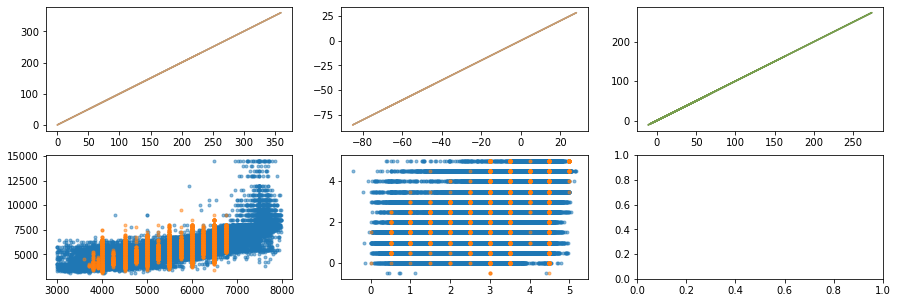

In [17]:
figure(figsize=(15,5)) # the ra, dec look promising.
# next I'll check the other databases.
subplot(231)
plot(merge_1.ra_dr2, merge_1.ra, alpha=0.5)
plot(merge_2.ra_x, merge_2.ra_y, alpha=0.5)

subplot(232)
plot(merge_1.dec_dr2, merge_1.dec, alpha=0.5)
plot(merge_2.dec_x, merge_2.dec_y, alpha=0.5)

subplot(233) # tells us parallax_x doesn't agree totally
plot(merge_1['parallax'], merge_1['parallax.1'], alpha=0.5)
plot(merge_2['parallax_x'], merge_2['parallax_y'], alpha=0.5) # this is the one that's different
plot(merge_2['parallax_y'], merge_2['parallax.1'], alpha=0.5)

subplot(234)
plot(merge_1.teff, merge_1.rv_template_teff, '.', alpha=0.5)
plot(merge_2.dr2_rv_template_teff,merge_2.rv_template_teff, '.', alpha=0.5)

subplot(235)
plot(merge_1.logg, merge_1.rv_template_logg, '.', alpha=0.5)
plot(merge_2.dr2_rv_template_logg,merge_2.rv_template_logg, '.', alpha=0.5)

subplot(236)

In [ ]:
# it seems like they both work, but the designation one works for more targets.